# C10.2 Python Application
实验人：20980066 黄子维 / 20980062 黄睿杰

Date: 2022-03-08
桌号：206A06

## 1. 实验内容


### 1.1. Latex
Pearson相关系数计算公式：
$$
r = \frac{(\sum_{i=1}^{n}{X_i-\bar{X}})({Y_i-\bar{Y}})}{\sqrt{\sum_{i=1}^{n}{(X_i-\bar{X})^2}}\sqrt{\sum_{i=1}^{n}{(Y_i-\bar{Y})^2}}}
$$

### 1.2. 实验2.2.4代码解释
```
df2 = df.melt(id_vars=['Class', 'Gendar'], value_vars = ['Math', 'Physics'], value_name = 'Score', var_name = 'Subject')

df2['Gendar'] = df2['Gendar'].replace("男", "Male")
df2['Gendar'] = df2['Gendar'].replace("女", "Female")
df2['Class'] = df2['Class'].str.replace('级', "-")
df2['Class'] = df2['Class'].str.replace('班', "")

df2
sns.displot(df2, x='Score', kind='hist', 
            hue='Subject', row='Gendar', 
            col='Class', height=5, 
            aspect=1, kde=True, multiple='dodge')
plt.savefig(r'C10.2-Output\Fig.1.1.png', bbox_inches = 'tight', dpi=300)
```
**代码1：**

使用Dataframe`melt`方法，将宽格式数据转为长格式数据。其中保留`Class`和`Gendar`，而将`Math`和 `Physics`数值融合为一列`Score`，由`Subject`标记。

**代码2：**

使用`replace`方法将datafram中的中文替换为英文

处理后的Dataframe：
| Index | Class  | Gendar  | Subject |Score|
|-------|--------|---------|---------|-----|
| 0     | 2011-A | Male    | Math    | 88  |
| 1     | 2011-A | Male    | Math    | 90  |
| 2     | 2011-A | Female  | Math    | 92  |
| 3     | 2011-A | Male    | Math    | 84  |
| 4     | 2011-A | Female  | Math    | 75  |
| ...   | ...    | ...     | ...     | ... |
| 135   | 2013-B | Male    | Physics | 90  |
| 136   | 2013-B | Male    | Physics | 89  |
| 137   | 2013-B | Female  | Physics | 87  |
| 138   | 2013-B | Male    | Physics | 87  |
| 139   | 2013-B | Male    | Physics | 89  |





**代码3：**

使用`Seaborn.displot`函数绘制分类分布图，生成6x2子图，其中行为按性别分类，列为按班级分类，图表包含直方图和核密度图，直方图为平行堆叠。

seaborn website: [Seaborn](https://seaborn.pydata.org/)



### 1.3. 其他实验介绍

- 2.1 Numpy
  - 2.1.1 Data generaion：生成数组并重塑
  - 2.1.2 Data Sliding：使用切片提取数组部分数据
  - 2.1.3 Axis：数组的轴，即为运算操作方向
  - 2.1.4 np.where：查找数组中特定元素位置
  - 2.1.5 broadcast：数组广播的概念
  - 2.1.6 Matrix：Numpy数组的矩阵运算
- 2.2. Pandas
  - 2.2.1. Import data：从tsv中读取数据并生成Dataframe
  - 2.2.2. 利用切片从DataFrame中提取数据
  - 2.2.3. Data Summary：简单的数据统计
  - 2.2.4. Data Analysis：绘制数据的分布图
- 综合编程
  - 3.1 Numpy综合练习
  - 3.2 计算Pearson相关系数
  - 3.3 快速傅里叶变换

## 2. 程序练习

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft, fftfreq

### 2.1. Numpy

#### 2.1.1 Data generation

In [141]:
arr=np.arange(1,151)
arr.shape=(2,3,5,5)
#arr.shape=(3,5,10)
#arr.shape=(15,10)
arr

array([[[[  1,   2,   3,   4,   5],
         [  6,   7,   8,   9,  10],
         [ 11,  12,  13,  14,  15],
         [ 16,  17,  18,  19,  20],
         [ 21,  22,  23,  24,  25]],

        [[ 26,  27,  28,  29,  30],
         [ 31,  32,  33,  34,  35],
         [ 36,  37,  38,  39,  40],
         [ 41,  42,  43,  44,  45],
         [ 46,  47,  48,  49,  50]],

        [[ 51,  52,  53,  54,  55],
         [ 56,  57,  58,  59,  60],
         [ 61,  62,  63,  64,  65],
         [ 66,  67,  68,  69,  70],
         [ 71,  72,  73,  74,  75]]],


       [[[ 76,  77,  78,  79,  80],
         [ 81,  82,  83,  84,  85],
         [ 86,  87,  88,  89,  90],
         [ 91,  92,  93,  94,  95],
         [ 96,  97,  98,  99, 100]],

        [[101, 102, 103, 104, 105],
         [106, 107, 108, 109, 110],
         [111, 112, 113, 114, 115],
         [116, 117, 118, 119, 120],
         [121, 122, 123, 124, 125]],

        [[126, 127, 128, 129, 130],
         [131, 132, 133, 134, 135],
         [136, 1

#### 2.1.2 Data Sliding

In [142]:
arr.shape=(2,3,5,5)
#arr[0,0,0]
arr[:,:,1,1]
#arr[1,:,:,3]
#arr[[1,0]]

#arr_part=arr[1,2,3:]
#arr_part[:]=0.1
#arr

array([[  7,  32,  57],
       [ 82, 107, 132]])

#### 2.1.3 Axis

In [143]:
arr.shape=(2,3,5,5)
#arr.transpose()
#arr.transpose(0,2,3,1)
print(np.mean(arr,axis=2))
print('Origin dimension',arr.shape)
print('Average with axis=0:',np.mean(arr,axis=0).shape)
print('Average with axis=1:',np.mean(arr,axis=1).shape)
print('Average with axis=2:',np.mean(arr,axis=2).shape)

[[[ 11.  12.  13.  14.  15.]
  [ 36.  37.  38.  39.  40.]
  [ 61.  62.  63.  64.  65.]]

 [[ 86.  87.  88.  89.  90.]
  [111. 112. 113. 114. 115.]
  [136. 137. 138. 139. 140.]]]
Origin dimension (2, 3, 5, 5)
Average with axis=0: (3, 5, 5)
Average with axis=1: (2, 5, 5)
Average with axis=2: (2, 3, 5)


#### 2.1.4 np.where

In [144]:
import numpy as np
ind=np.where(arr%2==0)
arr[ind]
#arr[arr%2==0]
#arr[(arr>10)&(arr<40)]=0
#arr

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150])

#### 2.1.5 broadcast

In [145]:
arr2=np.zeros((3,3,3,3))
arr3=np.arange(9).reshape(3,1,3)
res=np.add(arr2,arr3)

print('arr3:\n',arr3)
print('arr2.shape={0}\n arr3.shape={1}\n res.shape={2}\n'
    .format(arr2.shape,arr3.shape,res.shape))

arr3:
 [[[0 1 2]]

 [[3 4 5]]

 [[6 7 8]]]
arr2.shape=(3, 3, 3, 3)
 arr3.shape=(3, 1, 3)
 res.shape=(3, 3, 3, 3)



#### 2.1.6 Matrix

In [146]:
mat1=np.arange(9).reshape(3,3)
mat2=np.random.rand(3,3)
print(mat1)
print(mat2)
print(mat1.dot(mat2))
print(mat1@mat2)
print(np.linalg.inv(mat2))
print(np.trace(mat1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0.44724609 0.18986802 0.13368324]
 [0.51346607 0.58366482 0.98832585]
 [0.3963983  0.2538723  0.99492047]]
[[ 1.30626267  1.09140941  2.97816679]
 [ 5.37759407  4.17362483  9.32895548]
 [ 9.44892546  7.25584024 15.67974417]]
[[ 1.30626267  1.09140941  2.97816679]
 [ 5.37759407  4.17362483  9.32895548]
 [ 9.44892546  7.25584024 15.67974417]]
[[ 2.96085416 -1.39127013  0.98421097]
 [-1.06916004  3.51920199 -3.35221719]
 [-0.90685382 -0.34367651  1.46835408]]
12


### 2.2. Pandas

#### 2.2.1. Import data

In [4]:
df = pd.read_csv("C10.2-Data/Class.tsv", sep="\s+", index_col=0)
df

,Class,Name,Gendar,ClassSponsor,Math,English,Physics
ID,,,,,,,
2011A01,2011级A班,麦麦提,男,郭靖,88,87,90
2011A02,2011级A班,孙涵,男,郭靖,90,59,91
2011A03,2011级A班,汤子,女,郭靖,92,98,92
2011A04,2011级A班,王婧文,男,郭靖,84,71,90
2011A05,2011级A班,王瑞,女,郭靖,75,58,72
...,...,...,...,...,...,...,...
2013B07,2013级B班,梁芷若,男,周伯通,96,77,90
2013B08,2013级B班,廖军迎,男,周伯通,83,74,89
2013B09,2013级B班,廖志广,女,周伯通,91,51,87


#### 2.2.2. Extract data

In [6]:
# Filter
df[['Class','ClassSponsor','Name','Physics']].sort_values(by='Physics', ascending=False)

,Class,ClassSponsor,Name,Physics
ID,,,,
2011A10,2011级A班,郭靖,许阳刚,92
2011A03,2011级A班,郭靖,汤子,92
2011B01,2011级B班,郭靖,杨昭贤,92
2012B05,2012级B班,黄蓉,王庆,92
2013A01,2013级A班,周伯通,曹芳,91
...,...,...,...,...
2011A05,2011级A班,郭靖,王瑞,72
2012B11,2012级B班,黄蓉,肖庆鹏,70
2011A09,2011级A班,郭靖,谢烨,64


In [7]:
df['2011A01':'2011A12']

,Class,Name,Gendar,ClassSponsor,Math,English,Physics
ID,,,,,,,
2011A01,2011级A班,麦麦提,男,郭靖,88,87,90
2011A02,2011级A班,孙涵,男,郭靖,90,59,91
2011A03,2011级A班,汤子,女,郭靖,92,98,92
2011A04,2011级A班,王婧文,男,郭靖,84,71,90
2011A05,2011级A班,王瑞,女,郭靖,75,58,72
2011A06,2011级A班,魏志,男,郭靖,84,97,89
2011A07,2011级A班,文玺,男,郭靖,87,93,89
2011A08,2011级A班,吴茼茼,男,郭靖,92,78,87
2011A09,2011级A班,谢烨,男,郭靖,61,94,64


In [8]:
df[(df['Class'] == '2011级A班')&(df['Math'] < 70)]

,Class,Name,Gendar,ClassSponsor,Math,English,Physics
ID,,,,,,,
2011A09,2011级A班,谢烨,男,郭靖,61,94,64
2011A11,2011级A班,杨劼池,女,郭靖,58,61,58


#### 2.2.3 Data Summary

In [10]:
df.groupby(['Class']).mean()

,Math,English,Physics
Class,,,
2011级A班,82.583333,78.416667,83.416667
2011级B班,85.416667,70.333333,85.583333
2012级A班,86.500000,79.333333,87.833333
2012级B班,87.846154,78.538462,87.076923
2013级A班,88.100000,76.600000,88.100000
2013级B班,89.454545,77.727273,88.363636


In [13]:
df[['Grade','Classes']] = df['Class'].str.extract('(\d+)级([A-Z])班') 
df

,Class,Name,Gendar,ClassSponsor,Math,English,Physics,Grade,Classes
ID,,,,,,,,,
2011A01,2011级A班,麦麦提,男,郭靖,88,87,90,2011,A
2011A02,2011级A班,孙涵,男,郭靖,90,59,91,2011,A
2011A03,2011级A班,汤子,女,郭靖,92,98,92,2011,A
2011A04,2011级A班,王婧文,男,郭靖,84,71,90,2011,A
2011A05,2011级A班,王瑞,女,郭靖,75,58,72,2011,A
...,...,...,...,...,...,...,...,...,...
2013B07,2013级B班,梁芷若,男,周伯通,96,77,90,2013,B
2013B08,2013级B班,廖军迎,男,周伯通,83,74,89,2013,B
2013B09,2013级B班,廖志广,女,周伯通,91,51,87,2013,B


In [14]:
pd.pivot_table(df, 
    index = ['Grade','Classes'], 
    values=['Physics','English'], 
    aggfunc = {'Physics':[np.mean,'count',np.std],'English':[np.mean,np.std]})

English            Physics                      
                    mean        std   count       mean        std
Grade Classes                                                    
2011  A        78.416667  15.138502    12.0  83.416667  11.804917
      B        70.333333  16.400296    12.0  85.583333  11.735404
2012  A        79.333333   7.487363    12.0  87.833333   2.480225
      B        78.538462  11.990381    13.0  87.076923   5.604485
2013  A        76.600000  14.354248    10.0  88.100000   2.078995
      B        77.727273  15.172942    11.0  88.363636   1.206045

#### 2.2.4. Data Analysis

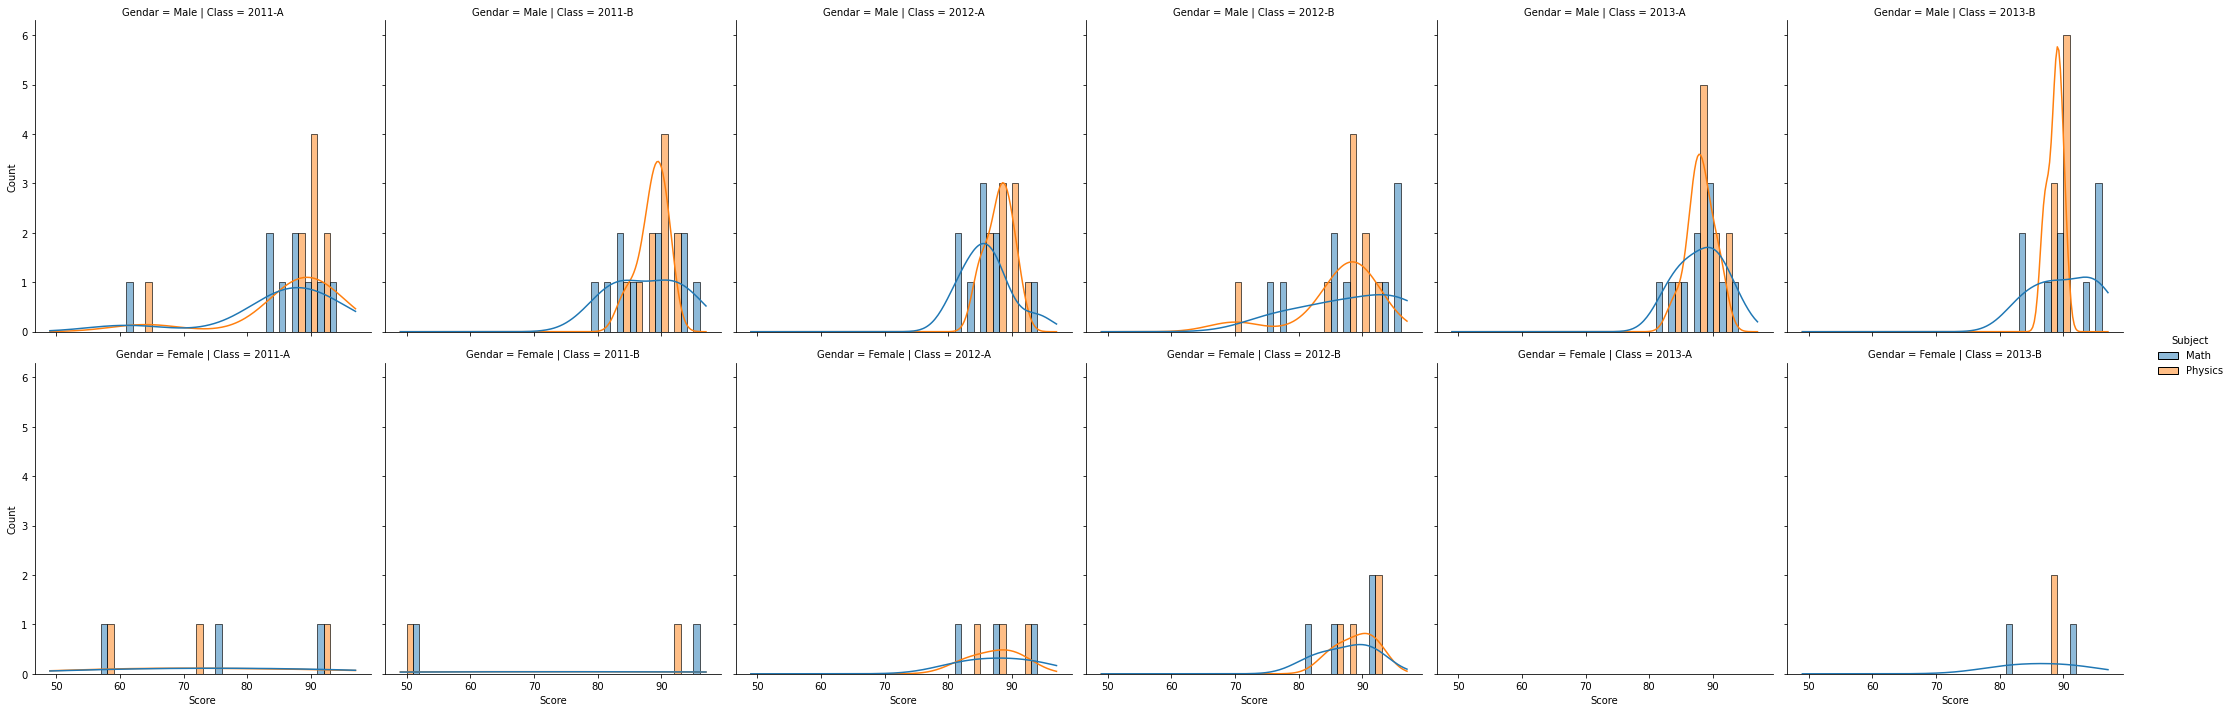

In [148]:
# df.hist(column=['Physics','Math'], by=['Class','Gendar'], bins=7)
df2 = df.melt(id_vars=['Class', 'Gendar'], value_vars = ['Math', 'Physics'], value_name = 'Score', var_name = 'Subject')
df2['Gendar'] = df2['Gendar'].replace("男", "Male")
df2['Gendar'] = df2['Gendar'].replace("女", "Female")
df2['Class'] = df2['Class'].str.replace('级', "-")
df2['Class'] = df2['Class'].str.replace('班', "")

df2
sns.displot(df2, x='Score', kind='hist', 
            hue='Subject', row='Gendar', 
            col='Class', height=5, 
            aspect=1, kde=True, multiple='dodge')
plt.savefig(r'C10.2-Output\Fig.1.1.png', bbox_inches = 'tight', dpi=300)

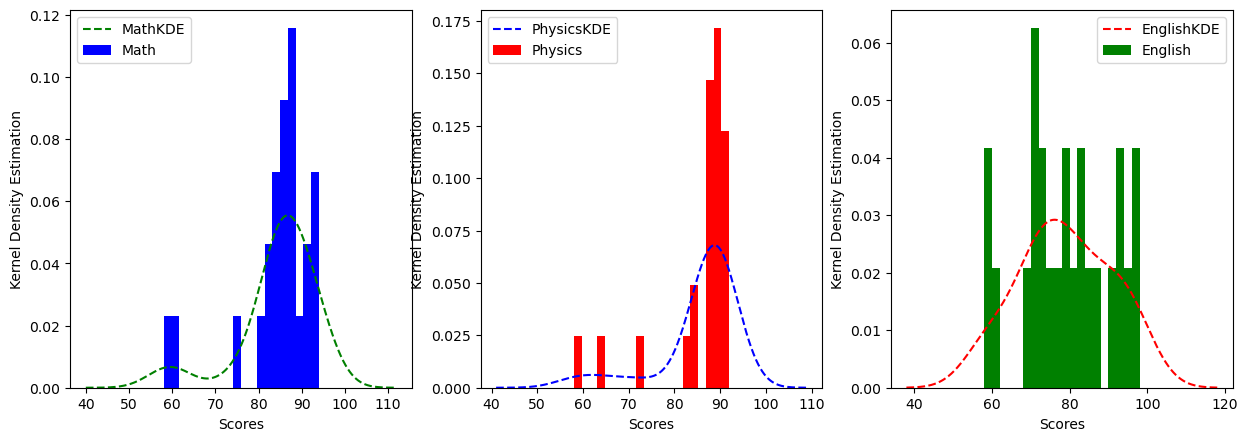

<Figure size 432x288 with 0 Axes>

In [91]:
plt.subplots(figsize=(15,5),dpi=100)
colors=['blue','red','green']
subs=['Math','Physics','English']
class1=df[(df['Class']=='2011级A班') |(df['Class']=='2012级A班')] 
for i in range(3):
    plt.subplot(1,3,i+1)
    class1[subs[i]].plot(kind='hist',density=True,bins=20,label=subs[i],color=colors[i]
    )
    ax=class1[subs[i]].plot(kind='kde',linestyle='--',label=subs[i]+'KDE',color=colors[i-1])
    ax.set_ylabel('Kernel Density Estimation')
    ax.set_xlabel('Scores')
    #ax.set_xlabel('分数')
    plt.legend()
plt.show()
plt.savefig(r'C10.2-Output\Fig.1.3.png', bbox_inches = 'tight', dpi=300)


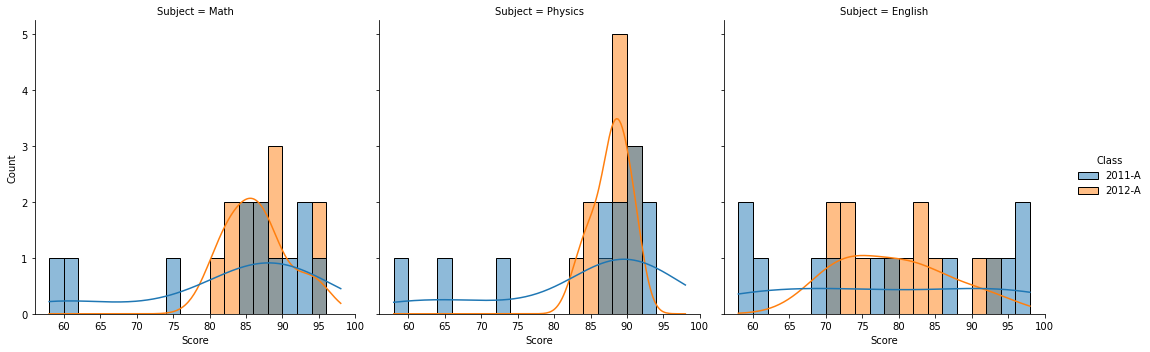

In [78]:
# class1=df[(df['Class']=='2011级A班') |(df['Class']=='2012级A班')] 
# class1.hist(bins=20,stacked=True) 

df3 = df.melt(id_vars=['Class'], value_vars = ['Math', 'Physics', 'English'], value_name = 'Score', var_name = 'Subject')
df3['Class'] = df3['Class'].str.replace('级', "-")
df3['Class'] = df3['Class'].str.replace('班', "")
df3 = df3[df3['Class'].isin(["2011-A", '2012-A'])]
df3
sns.displot(df3, x='Score', kind='hist', bins=20,
            hue='Class', 
            col='Subject', height=5, 
            aspect=1, kde=True)
plt.savefig(r'C10.2-Output\Fig.1.2.png', bbox_inches = 'tight', dpi=300)

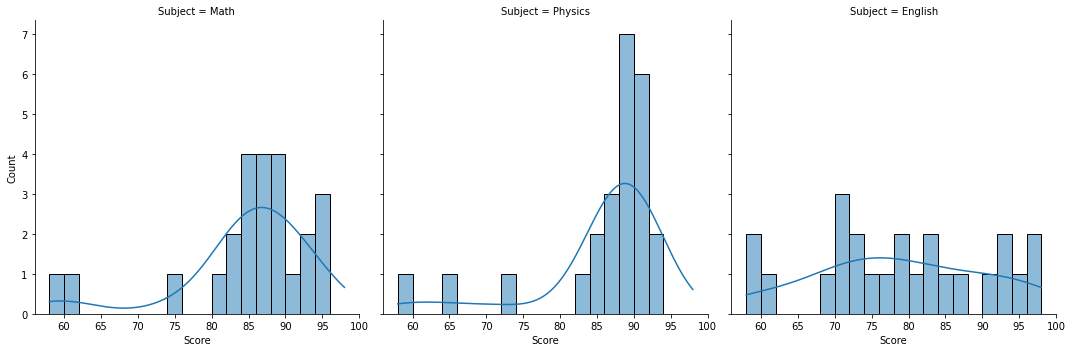

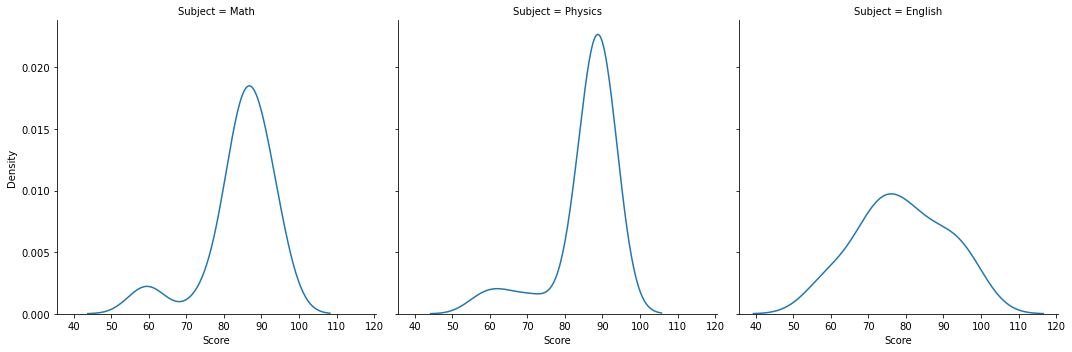

In [90]:
sns.displot(df3, x='Score', kind='hist', bins=20,
            col='Subject', height=5, 
            aspect=1, kde=True)
plt.savefig(r'C10.2-Output\Fig.1.3.1.png', bbox_inches = 'tight', dpi=300)


sns.displot(df3, x='Score', kind='kde',
            col='Subject', height=5, 
            aspect=1)
plt.savefig(r'C10.2-Output\Fig.1.3.2.png', bbox_inches = 'tight', dpi=300)

## 3. 综合编程

### 3.1 Exercise 1

In [147]:
arr=np.arange(0,150)
arr.shape=(5,5,6)
arr
np.savez("C10.2-Output/EX1-1", arr)

a = np.sum(arr, axis=2)
ind = np.where(arr%10 == 3)
for i in range(15):
     arr[ind[0][i],ind[1][i],ind[2][i]] = a[ind[0][i],ind[1][i]]

print(arr)
np.savez("C10.2-Output/EX1-2", arr)

[[[  0   1   2  15   4   5]
  [  6   7   8   9  10  11]
  [ 12  87  14  15  16  17]
  [ 18  19  20  21  22 123]
  [ 24  25  26  27  28  29]]

 [[ 30  31  32 195  34  35]
  [ 36  37  38  39  40  41]
  [ 42 267  44  45  46  47]
  [ 48  49  50  51  52 303]
  [ 54  55  56  57  58  59]]

 [[ 60  61  62 375  64  65]
  [ 66  67  68  69  70  71]
  [ 72 447  74  75  76  77]
  [ 78  79  80  81  82 483]
  [ 84  85  86  87  88  89]]

 [[ 90  91  92 555  94  95]
  [ 96  97  98  99 100 101]
  [102 627 104 105 106 107]
  [108 109 110 111 112 663]
  [114 115 116 117 118 119]]

 [[120 121 122 735 124 125]
  [126 127 128 129 130 131]
  [132 807 134 135 136 137]
  [138 139 140 141 142 843]
  [144 145 146 147 148 149]]]


### 3.2 Exercise 2

In [128]:
df4 = df[["Math", "Physics", "English"]]
df4.corr()

,Math,Physics,English
Math,1.000000,0.870921,0.011579
Physics,0.870921,1.000000,0.088289
English,0.011579,0.088289,1.000000


### 3.3 Exercise 3

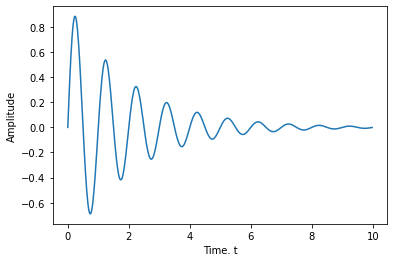

In [19]:
t = np.linspace(0,10,500,endpoint=False)
signals=np.exp(-0.5*t)*np.sin(2*np.pi*t)
plt.plot(t,signals)
plt.xlabel("Time. t")
plt.ylabel("Amplitude")
plt.savefig(r'C10.2-Output/Fig.2.1.png', bbox_inches = 'tight', dpi=300)

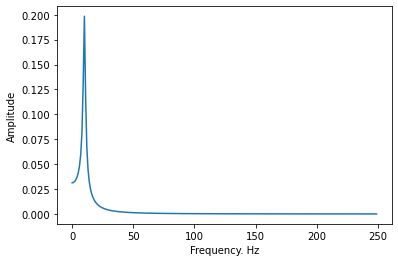

In [20]:
def FFT(y, t):
    fs =500
    # signal
    N = len(t)
    # fft
    yf = fft(y)
    xf = fftfreq(N, 1/fs)[:N//2]
    yf_nor = 2.0/N * np.abs(yf[0:N//2]) # normalization
    xf_half = xf[:len(yf_nor)]
    return xf_half,yf_nor 
plt.plot(FFT(signals, t)[0], FFT(signals, t)[1])
plt.xlabel("Frequency. Hz")
plt.ylabel("Amplitude")
plt.savefig(r'C10.2-Output/Fig.2.2.png', bbox_inches = 'tight', dpi=300)

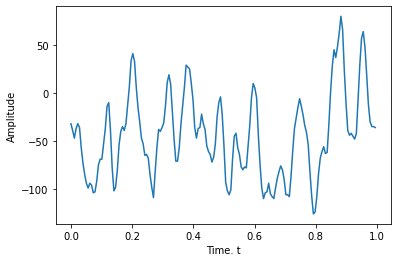

In [22]:
# df = pd.read_csv(r"C:\Users\12977\Desktop\Workspace\04-SYSU\SYSU-PHY-EXP-III\C10-Maximum_likelihood_estimation\C10.1-Linux_basic\3-FFTW\MYDATA\input.txt", sep="\s+", header=None)
t = np.linspace(0, 1, 178,endpoint=False)

plt.plot(t, df[0])
plt.xlabel("Time. t")
plt.ylabel("Amplitude")
plt.savefig(r'C10.2-Output/Fig.3.1.png', bbox_inches = 'tight', dpi=300)

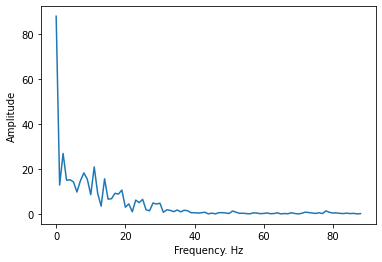

In [23]:
def FFT(y, t):
    fs =178
    # signal
    N = len(t)
    # fft
    yf = fft(y)
    xf = fftfreq(N, 1/fs)[:N//2]
    yf_nor = 2.0/N * np.abs(yf[0:N//2]) # normalization
    xf_half = xf[:len(yf_nor)]
    return xf_half,yf_nor 
plt.plot(FFT(df[0], t)[0], FFT(df[0], t)[1])
plt.xlabel("Frequency. Hz")
plt.ylabel("Amplitude")
plt.savefig(r'C10.2-Output/Fig.3.2.png', bbox_inches = 'tight', dpi=300)